### Importing the required Libraries

In [3]:
!pip install cmapPy

In [107]:
import pandas as pd
import numpy as np 
from cmapPy.pandasGEXpress.parse import parse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [142]:
data = parse('PAAD.gct')

#### The Data can't be opened in the normal pandas form, After some research I found out that the data has three values of DataFrame :- row_metadata, column_metadata, data

In [143]:
col_data = data.col_metadata_df
row_data = data.row_metadata_df
#complete data or c data 
c_data = data.data_df

### Let's look at what we have in the data files...

In [144]:
# Column data
col_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [145]:
#row data
row_data.head()

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


In [146]:
# complete data 
c_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


### Inference:- The Data in .gct file are stored by unique way where the rows and columns are matrices with ids and values. 

In [147]:
col_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Columns: 124 entries, participant_id to year_of_tobacco_smoking_onset
dtypes: float64(49), int64(10), object(65)
memory usage: 178.7+ KB


In [148]:
c_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18465 entries, SLC35E2 to psiTPTE22
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 13.7+ MB


## 1. 

In [149]:
c_data.isna().sum()

cid
aab1-Primary solid Tumor     645
aab4-Primary solid Tumor     532
aab6-Primary solid Tumor     983
aab8-Primary solid Tumor    1014
aab9-Primary solid Tumor     961
                            ... 
a89d-Solid Tissue Normal     581
a89d-Primary solid Tumor     593
a8sy-Primary solid Tumor     829
a8lh-Primary solid Tumor     699
aapl-Primary solid Tumor     934
Length: 183, dtype: int64

In [150]:
c_data.isna().sum().count()

183

## 1.1

### Thus there are 183 columns with missing values 

In [151]:
c_data.isna().sum().sum()

134954

### Ans. A total of 134954 data points are missing

### Removing All NAN values

In [152]:
f_data=c_data.dropna()

In [153]:
f_data.isna().sum().sum()
# thus no nan value is left in final data

0

In [154]:
len(f_data.columns)

183

In [130]:
f_data.columns[0]

'aab1-Primary solid Tumor'

## 1.2 Plotting the distributions 

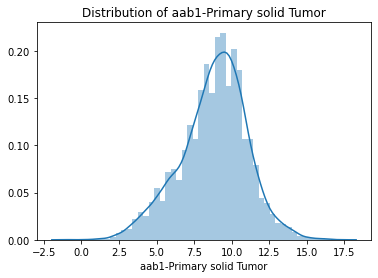

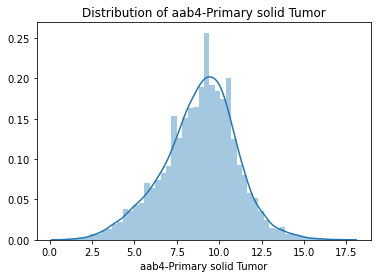

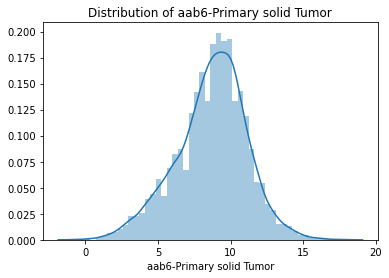

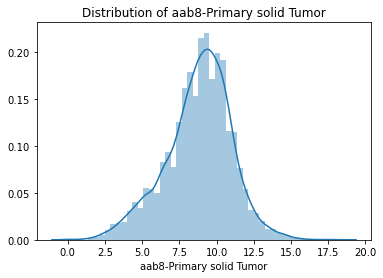

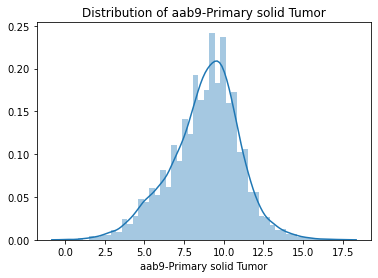

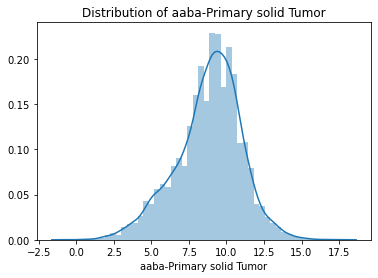

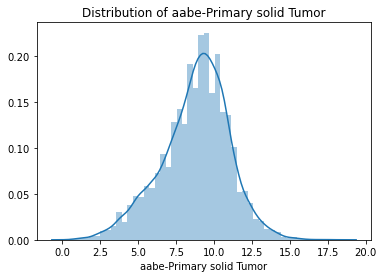

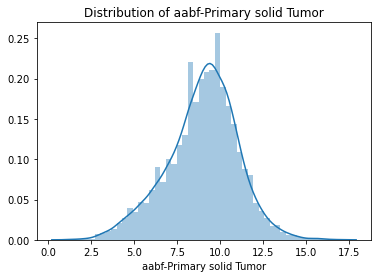

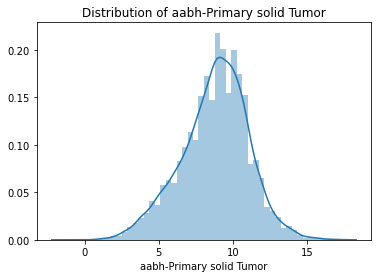

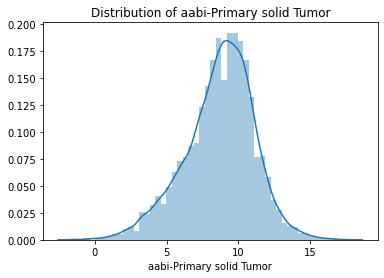

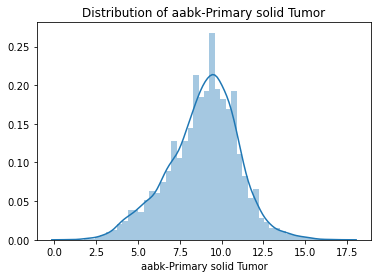

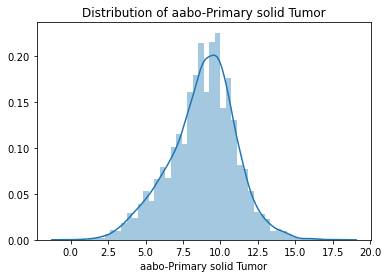

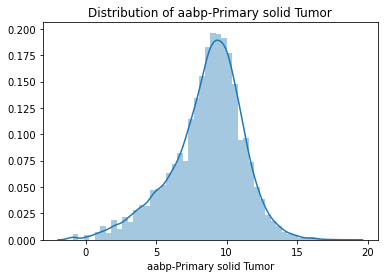

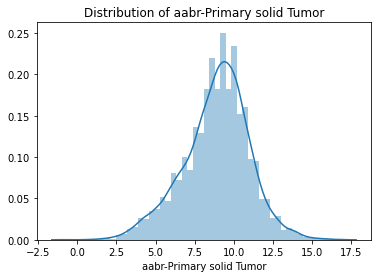

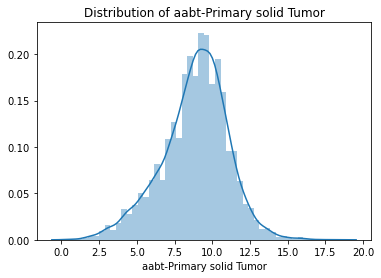

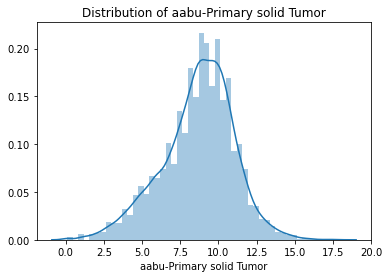

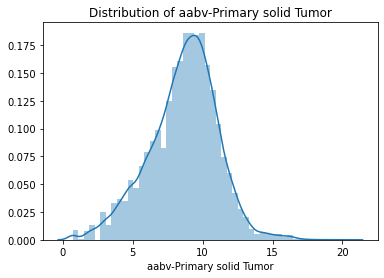

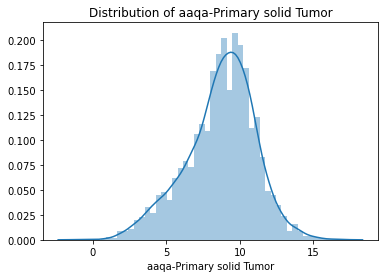

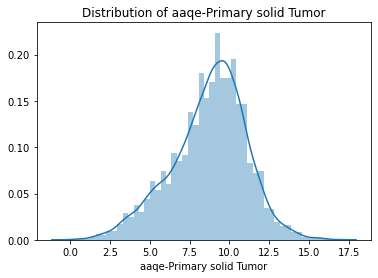

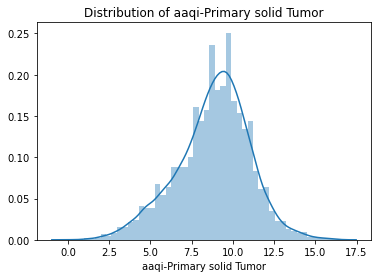

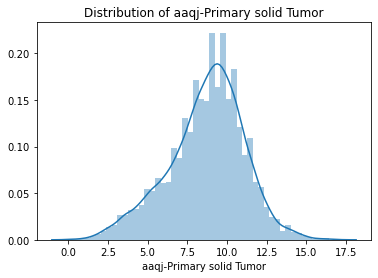

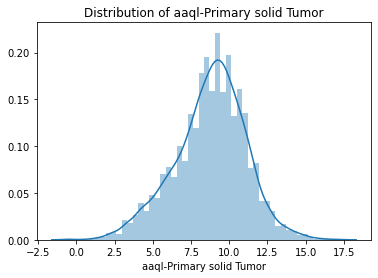

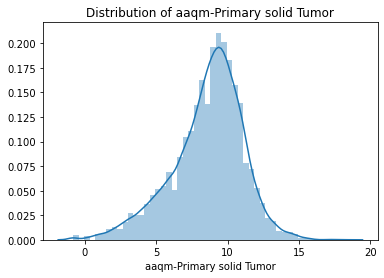

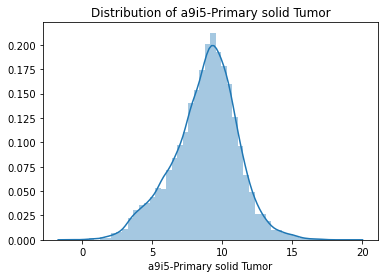

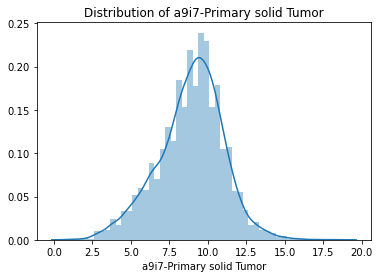

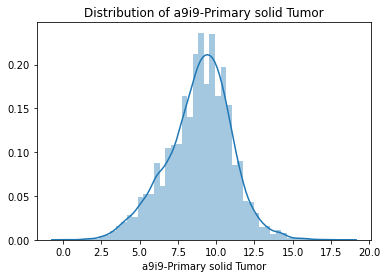

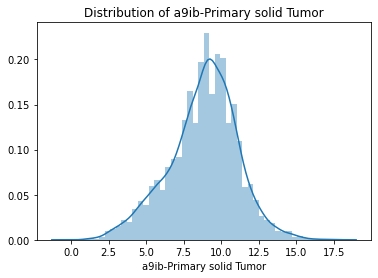

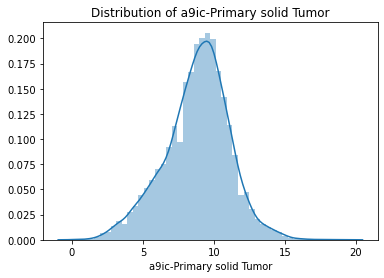

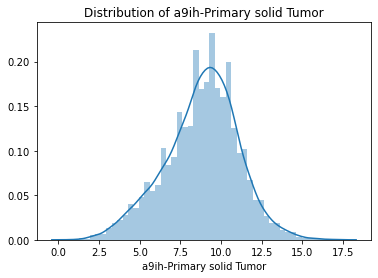

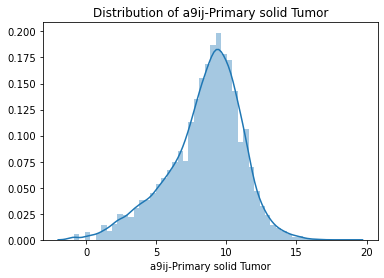

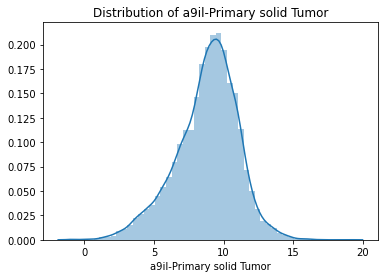

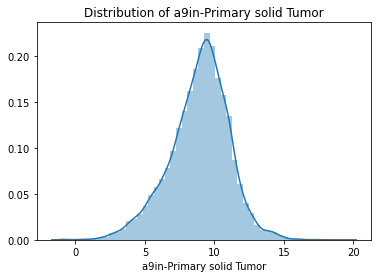

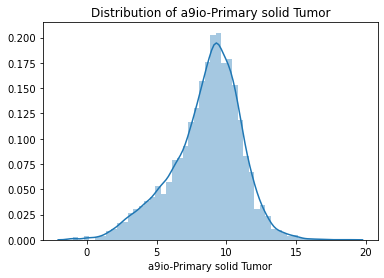

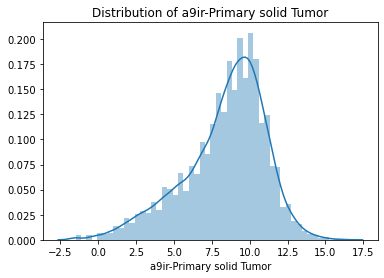

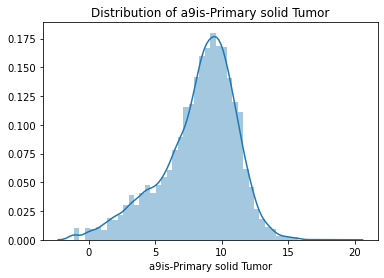

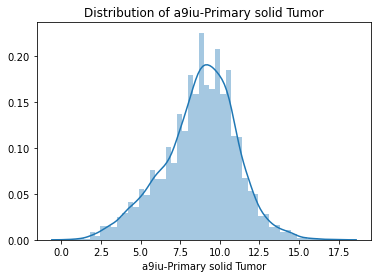

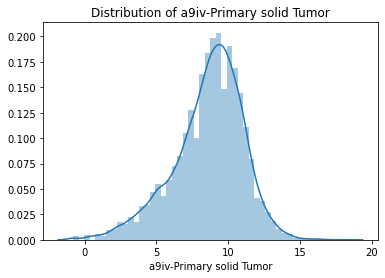

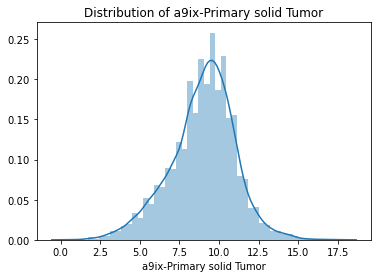

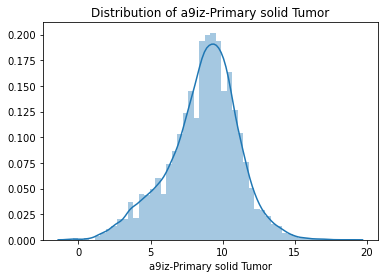

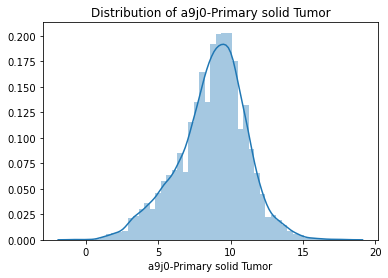

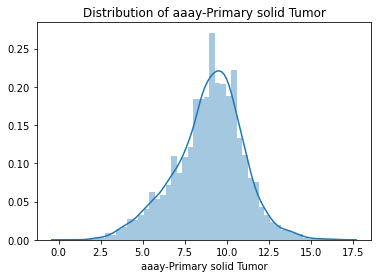

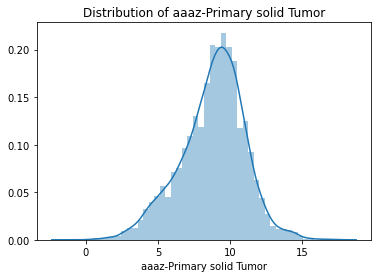

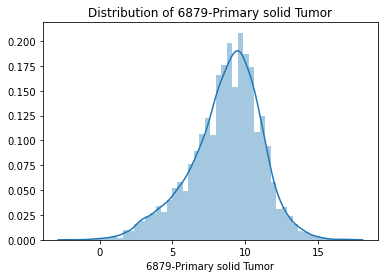

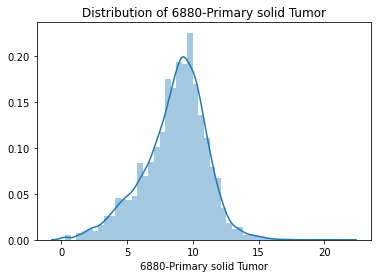

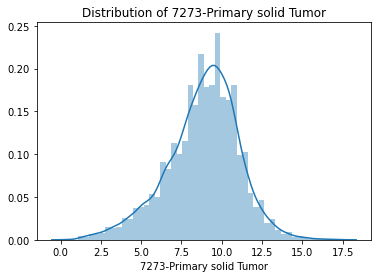

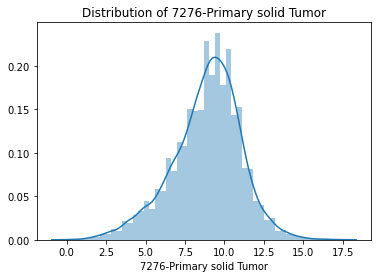

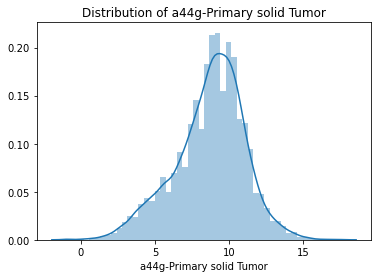

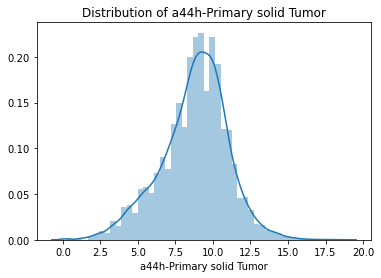

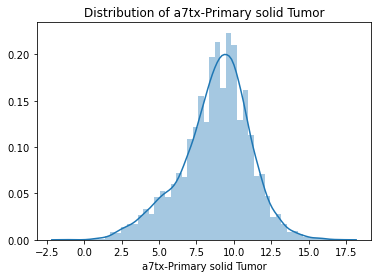

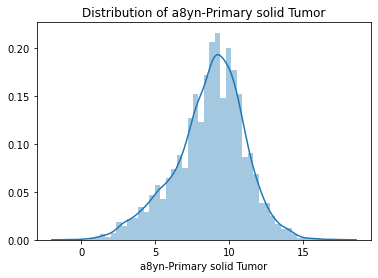

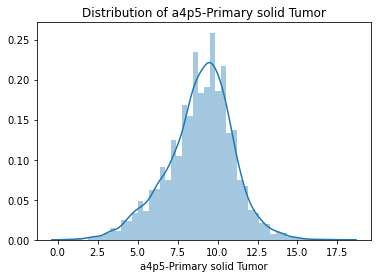

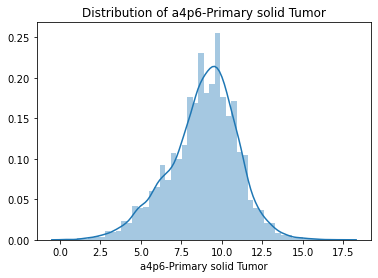

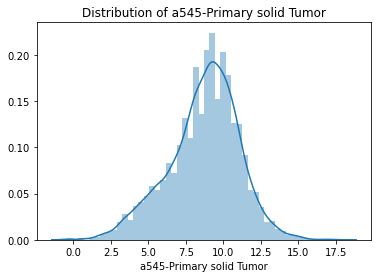

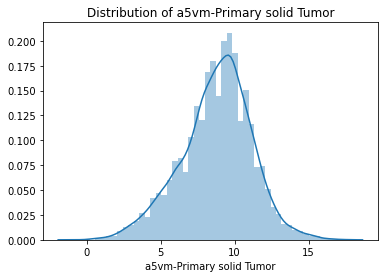

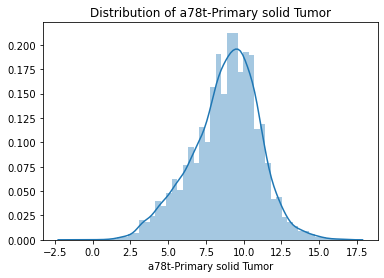

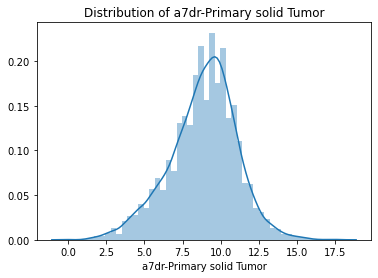

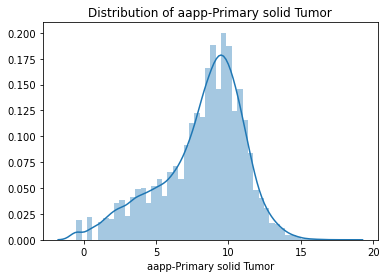

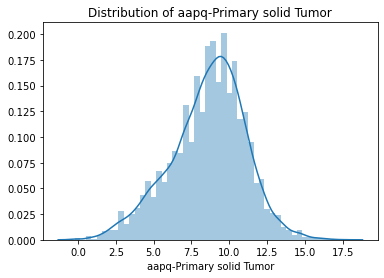

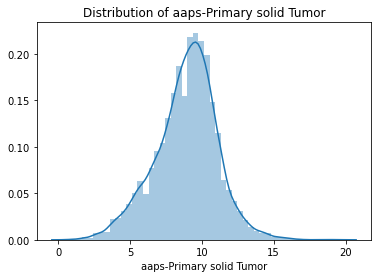

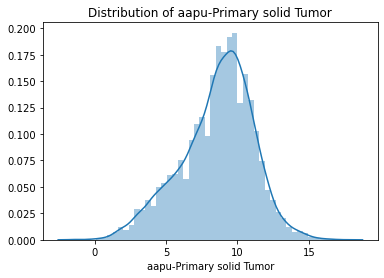

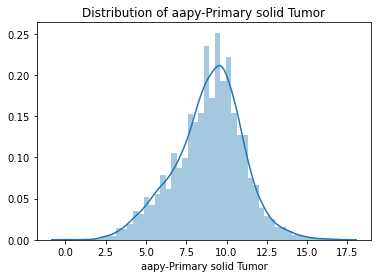

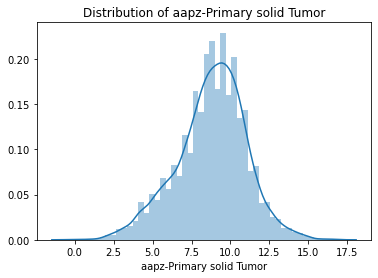

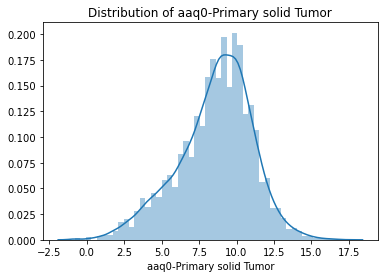

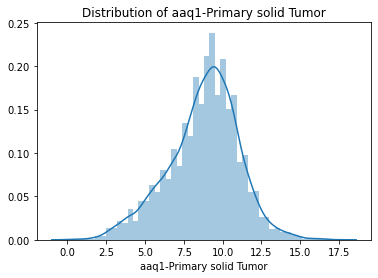

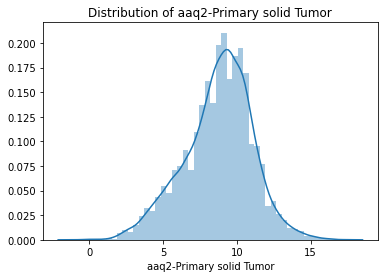

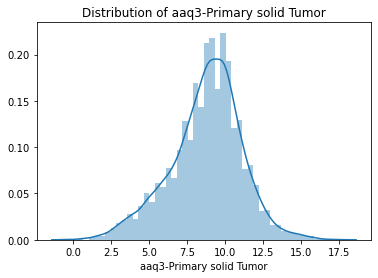

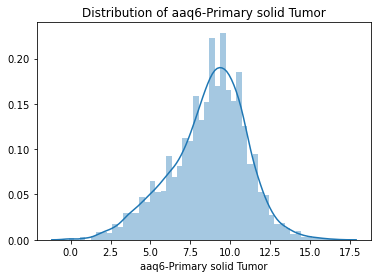

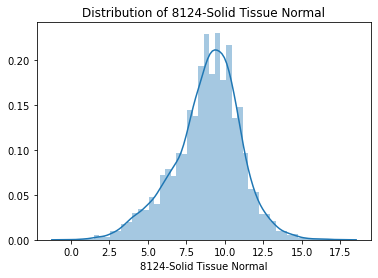

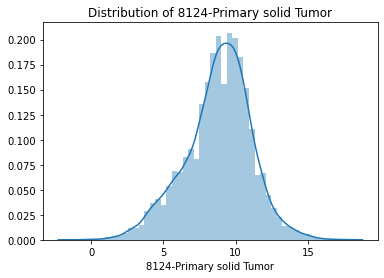

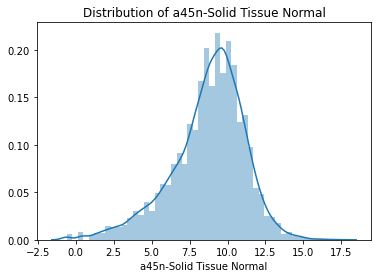

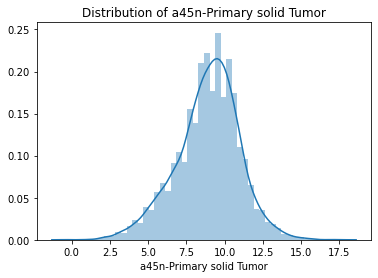

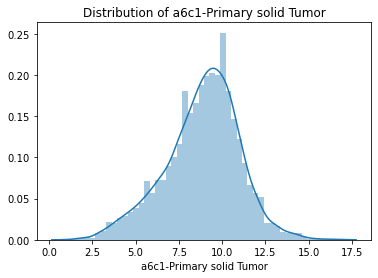

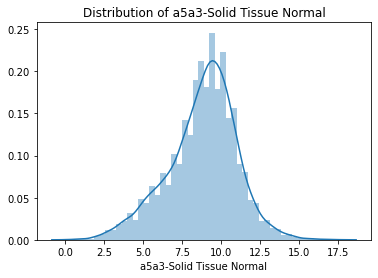

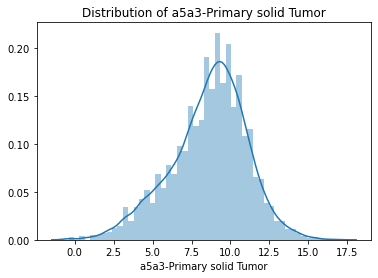

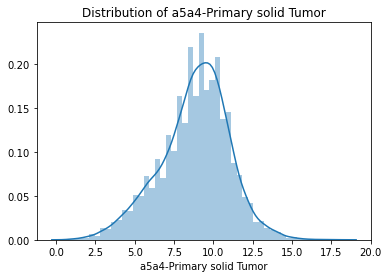

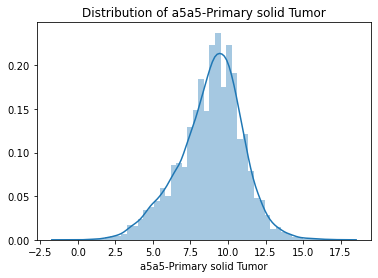

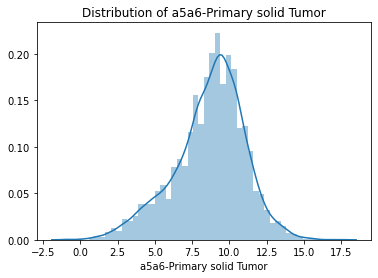

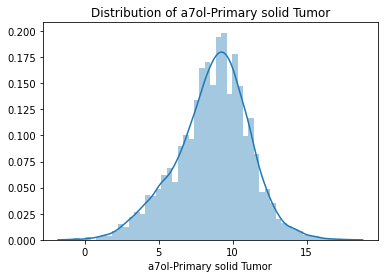

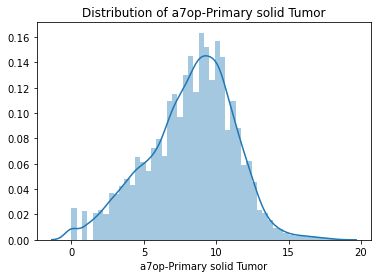

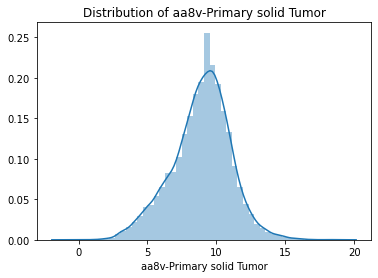

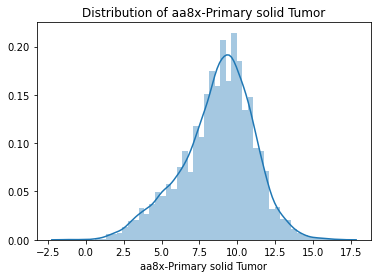

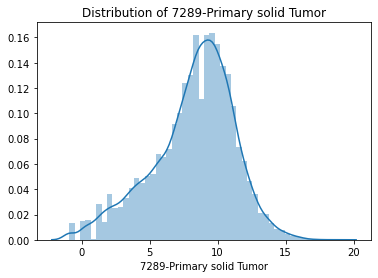

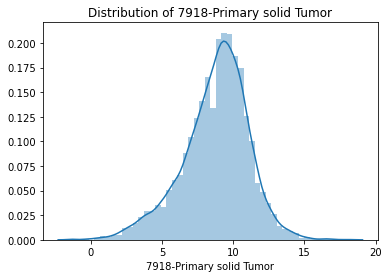

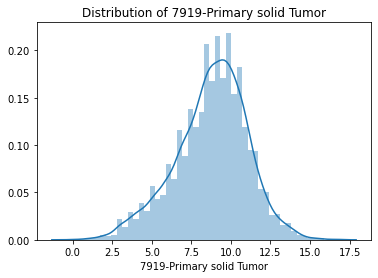

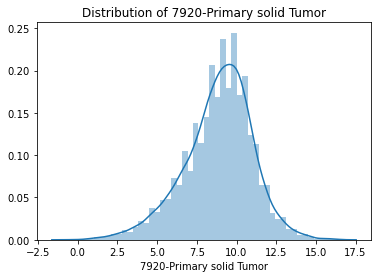

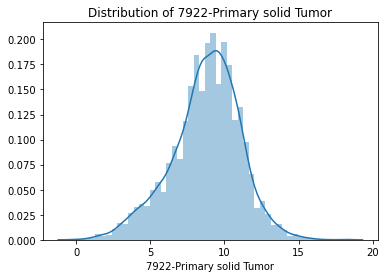

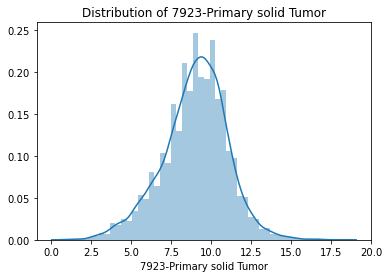

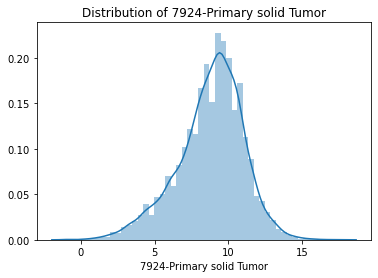

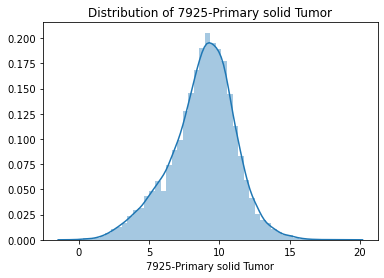

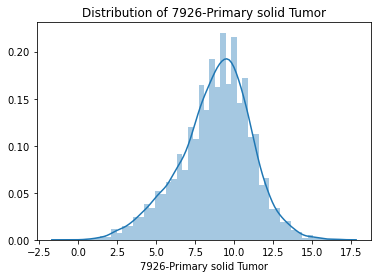

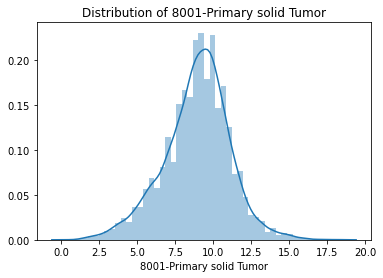

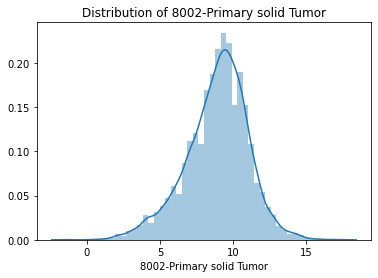

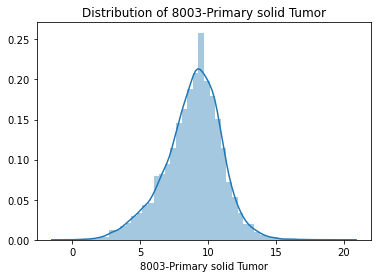

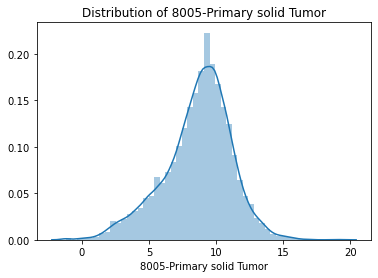

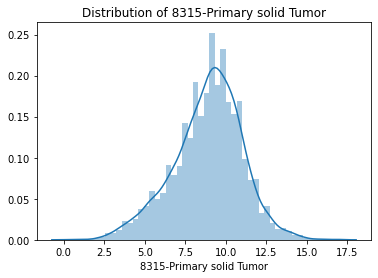

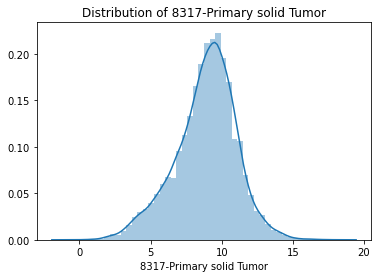

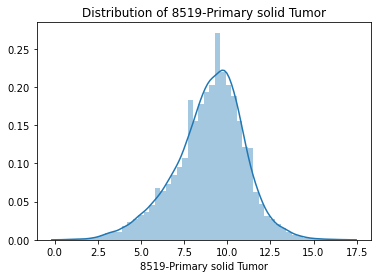

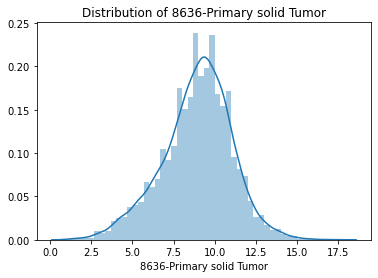

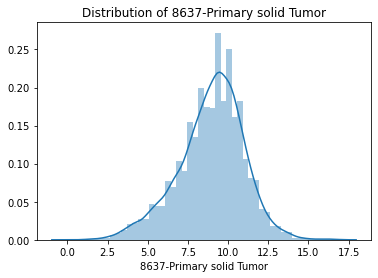

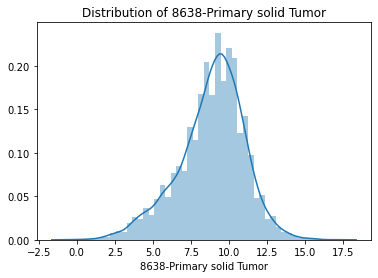

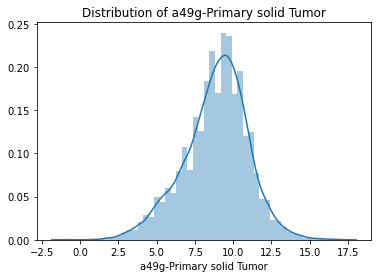

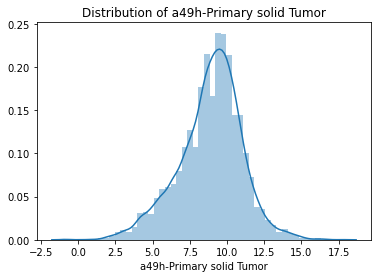

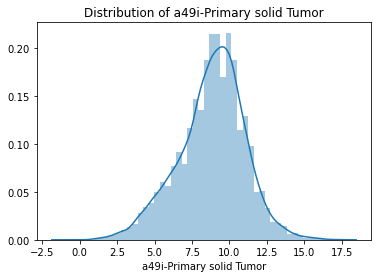

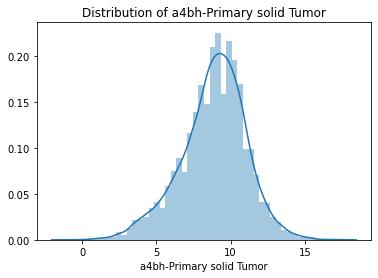

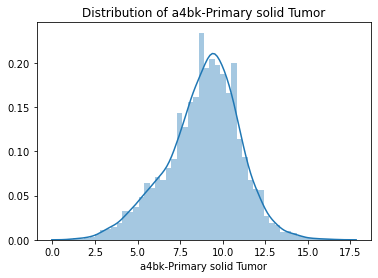

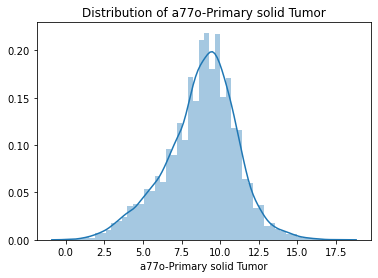

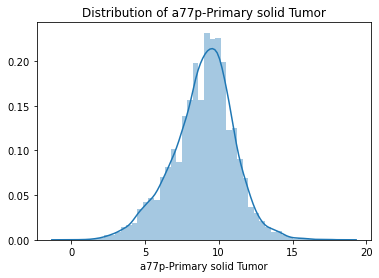

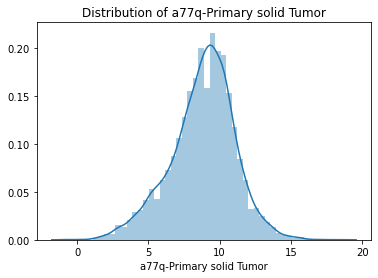

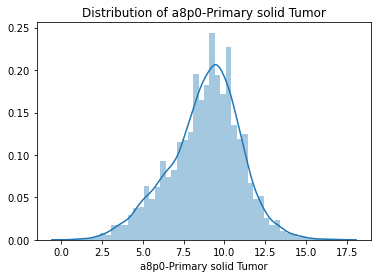

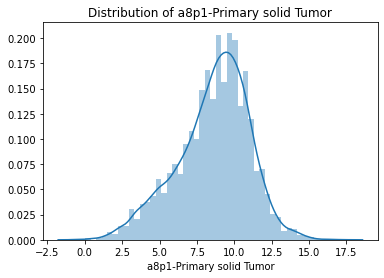

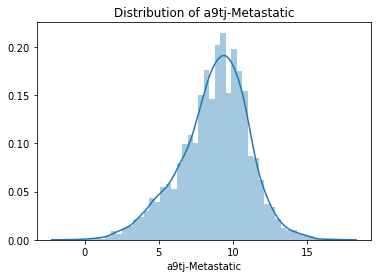

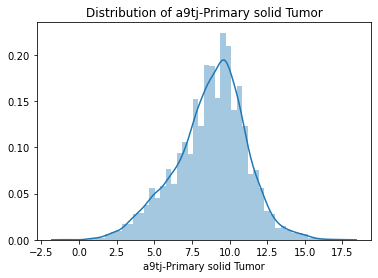

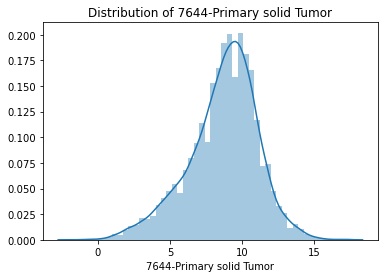

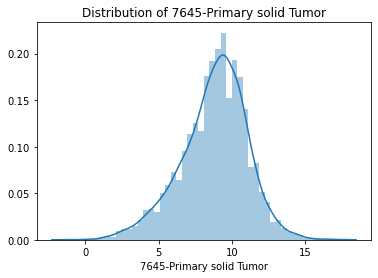

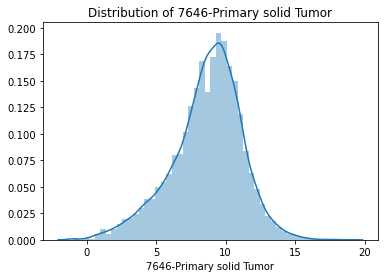

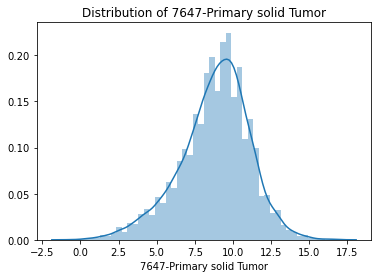

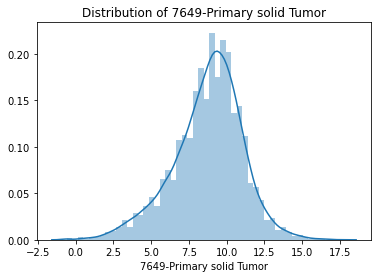

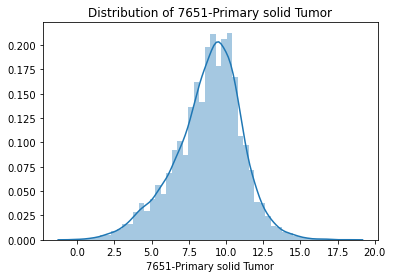

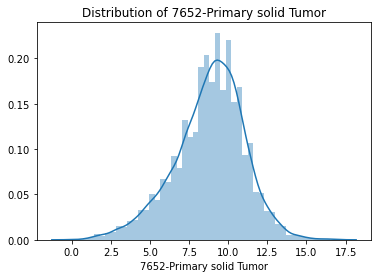

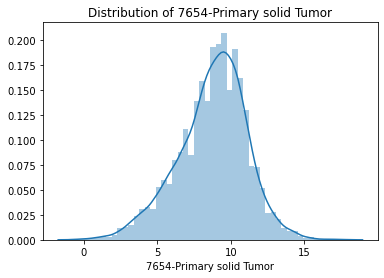

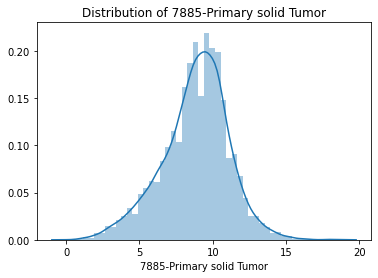

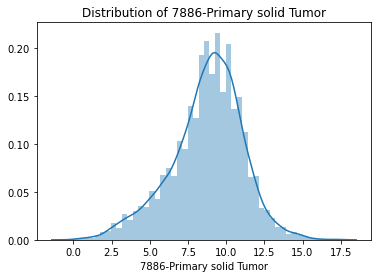

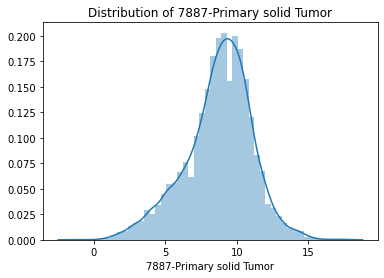

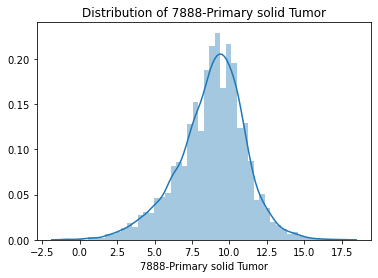

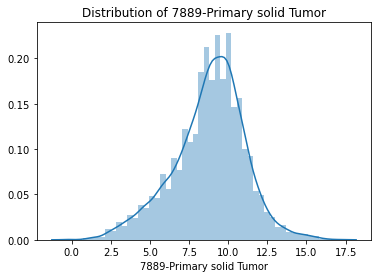

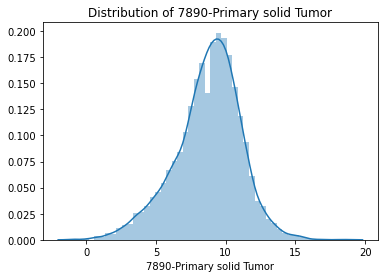

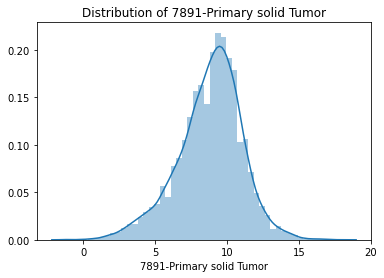

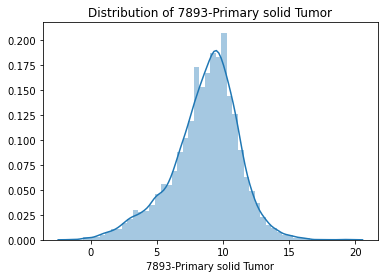

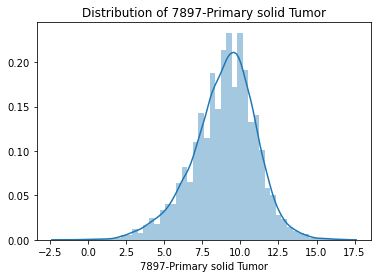

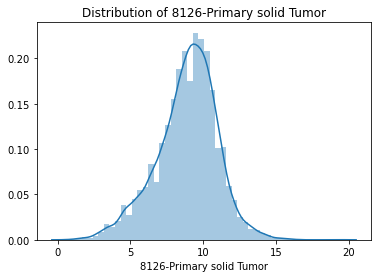

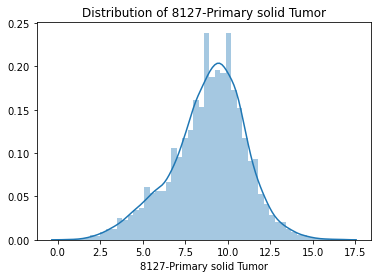

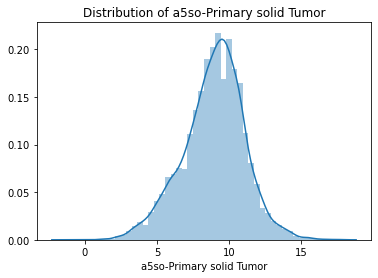

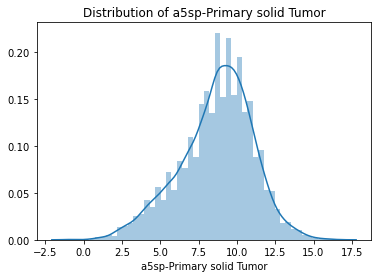

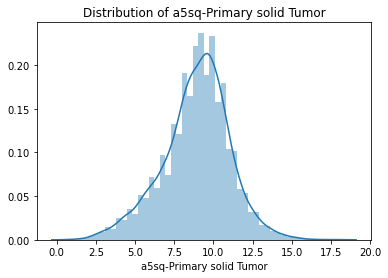

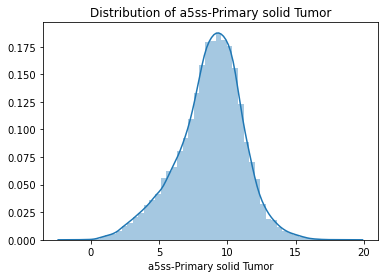

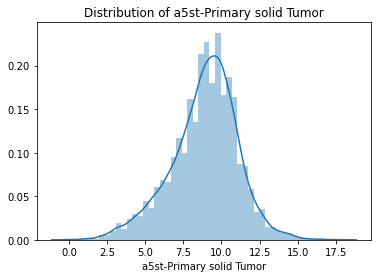

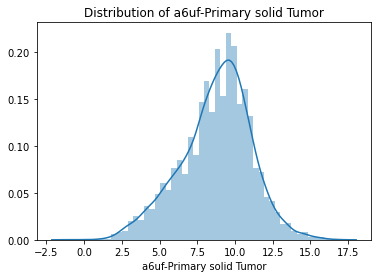

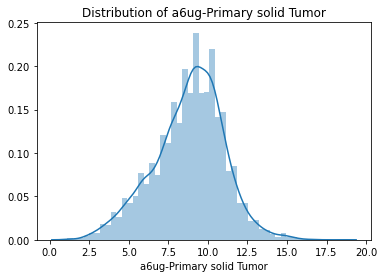

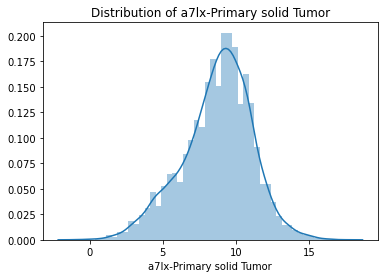

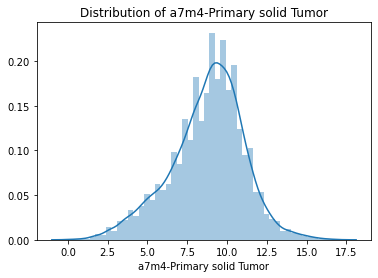

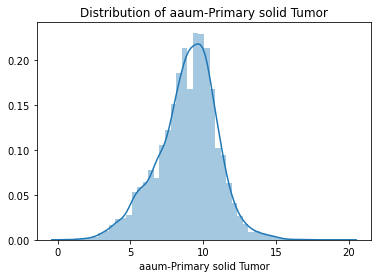

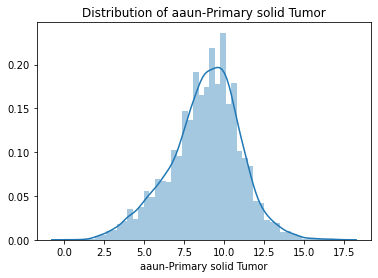

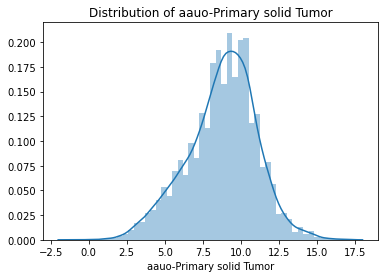

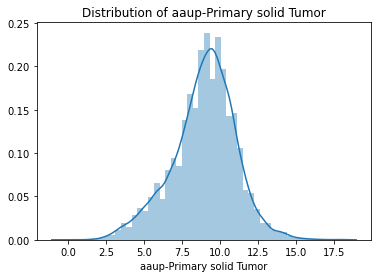

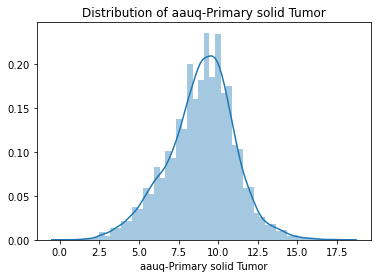

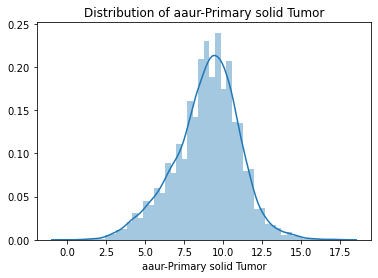

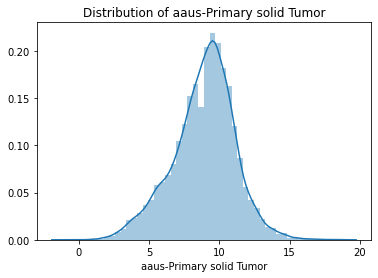

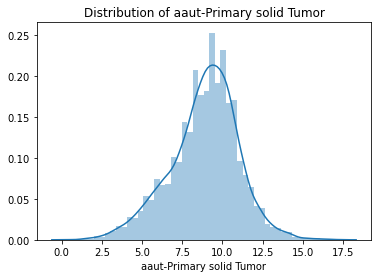

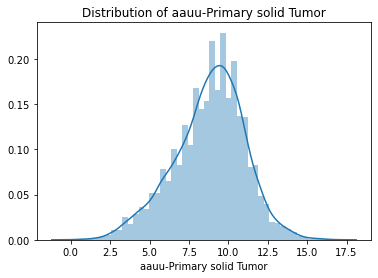

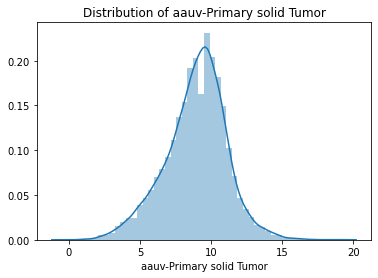

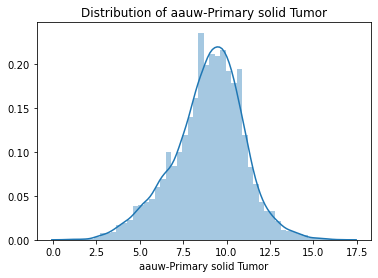

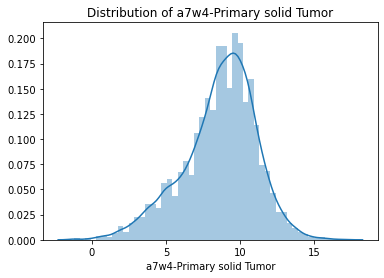

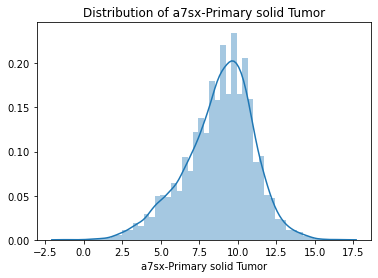

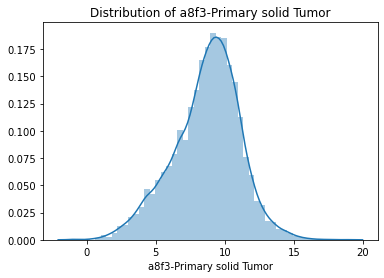

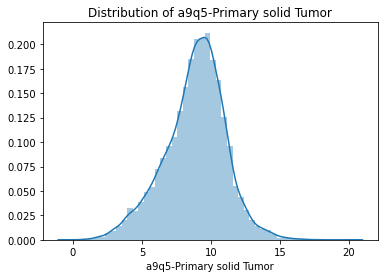

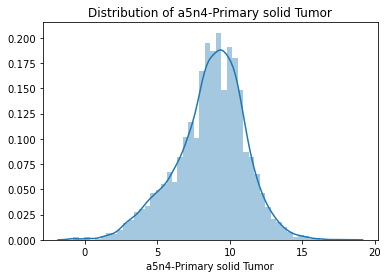

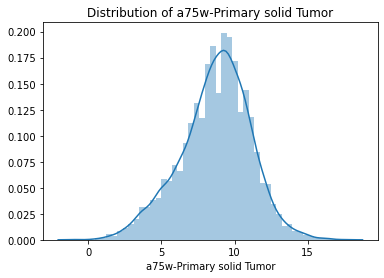

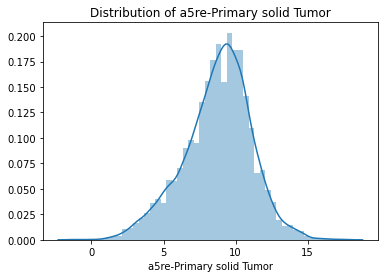

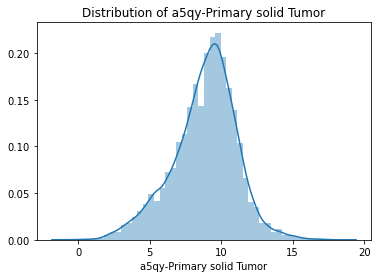

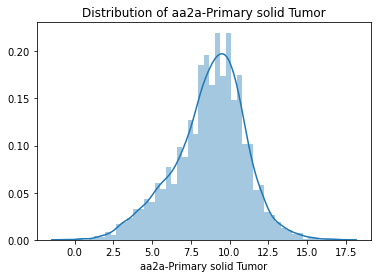

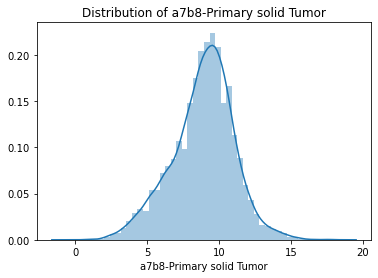

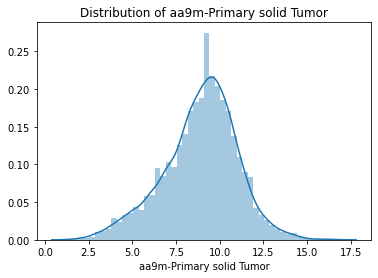

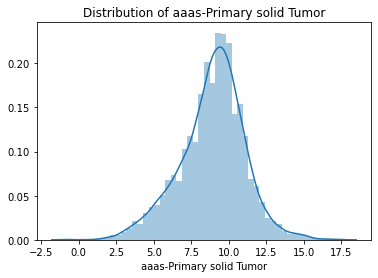

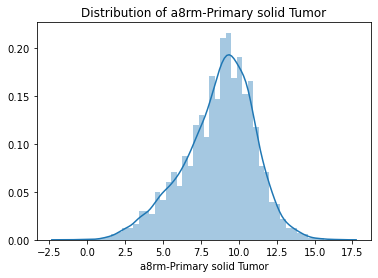

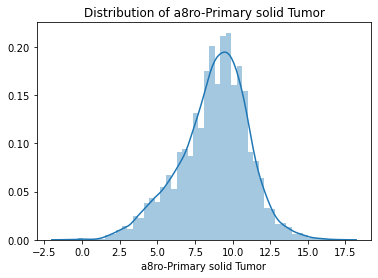

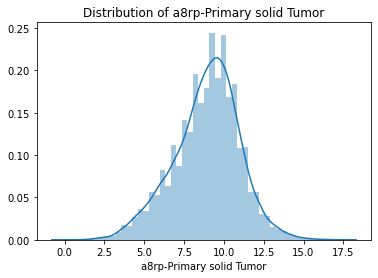

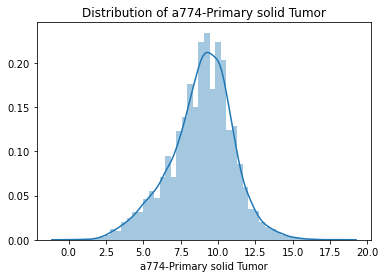

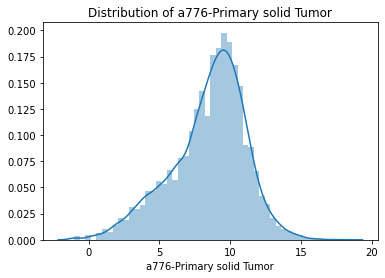

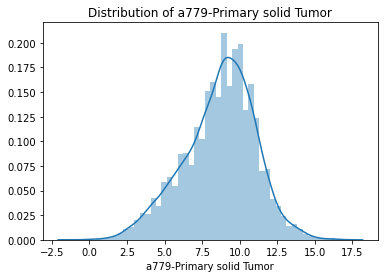

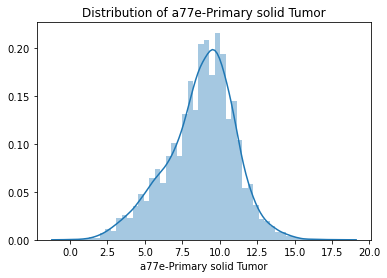

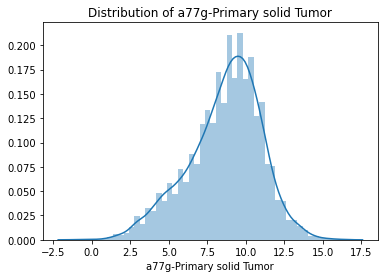

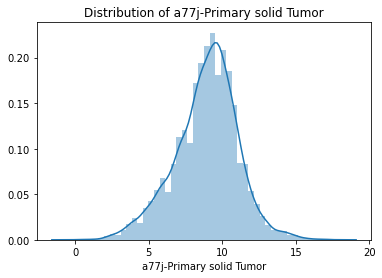

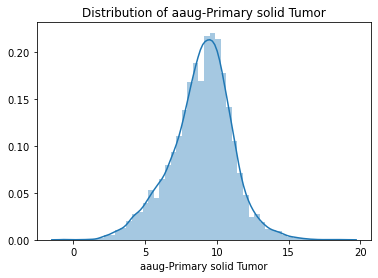

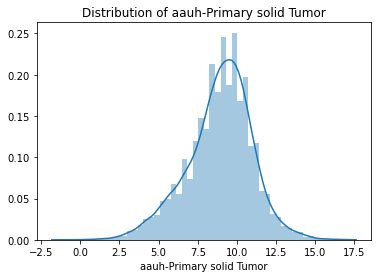

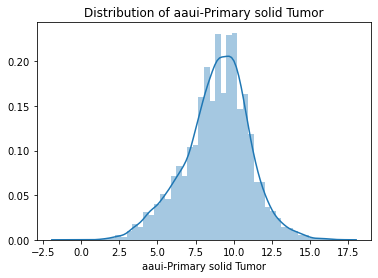

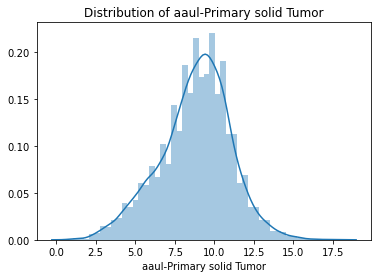

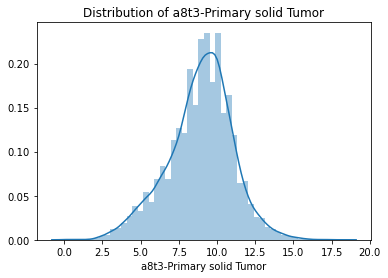

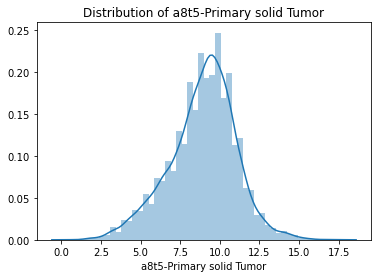

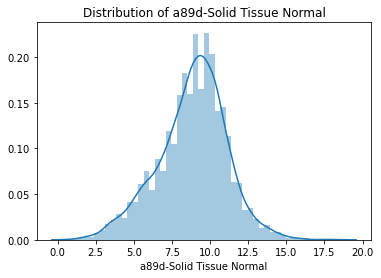

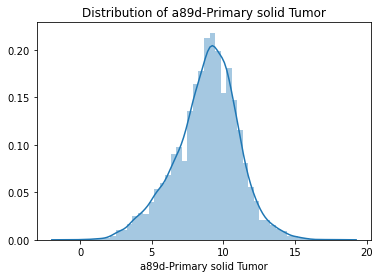

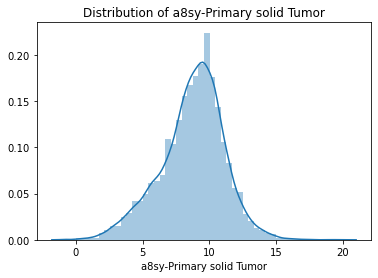

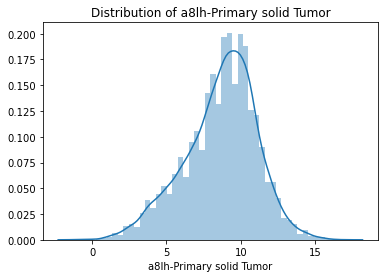

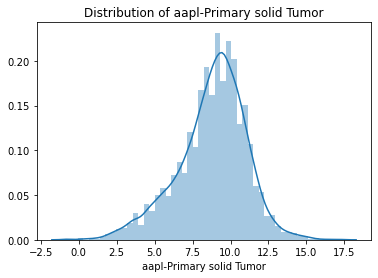

In [312]:
for i, var in enumerate(f_data.columns):
    plt.figure(i)
    plt.title("Distribution of " + str(var))
    sns.distplot(f_data[var], axlabel=var)

###  Ans. The plot of the gene expression accross all sample show that the distribution is mostly Negatively skewed Gaussian Distribution

## 2.

### Plotting PCA 

In [313]:
### transforming the data for plotting and finding pca

In [314]:
pca_data=f_data.T

### As a prerequistive we have to normalize the data for pca but since it is given that the data is already normalized, it is not necessary to that again

In [315]:
pca = PCA().fit(pca_data)

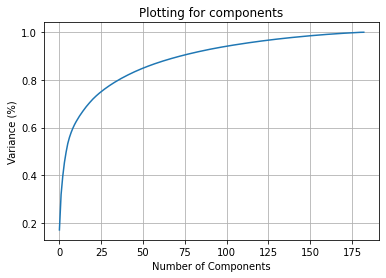

In [316]:
# plotting to see the variance of the data
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Plotting for components')
plt.show()

In [186]:
pca.explained_variance_ratio_.cumsum()

array([0.17050825, 0.3189652 , 0.3960236 , 0.4537545 , 0.49700192,
       0.53298753, 0.5587618 , 0.57924676, 0.5967127 , 0.61180174,
       0.6249492 , 0.63670343, 0.6482123 , 0.6585374 , 0.6685348 ,
       0.6781682 , 0.68731135, 0.69577694, 0.70404655, 0.7118905 ,
       0.71947354, 0.726353  , 0.7329376 , 0.73919916, 0.74517393,
       0.7507181 , 0.7562191 , 0.761576  , 0.76672024, 0.7717003 ,
       0.77643317, 0.7810188 , 0.78551847, 0.7899432 , 0.79415154,
       0.7983352 , 0.8024281 , 0.80628103, 0.81004006, 0.8137596 ,
       0.81736124, 0.82092184, 0.82438385, 0.8278064 , 0.831111  ,
       0.8343445 , 0.8375069 , 0.84054786, 0.8435433 , 0.8464947 ,
       0.84933996, 0.8521505 , 0.854927  , 0.85758924, 0.8602143 ,
       0.8627815 , 0.865327  , 0.86778873, 0.8701884 , 0.87256646,
       0.8748952 , 0.87714803, 0.879369  , 0.88156223, 0.8837009 ,
       0.88578504, 0.88785195, 0.88990146, 0.89191204, 0.8938606 ,
       0.89578855, 0.897675  , 0.8995319 , 0.90137666, 0.90318

### Since 95 percent values are for ncompenents = 125

In [187]:
n_components=125
pca = PCA(n_components)
df = pca.fit_transform(pca_data)

In [188]:
# adding the names to the pca so that it is easy to operate further
df1=pd.DataFrame(df,columns=['PCA'+str(i) for i in range(1,n_components+1)],index=None)

In [189]:
df1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA116,PCA117,PCA118,PCA119,PCA120,PCA121,PCA122,PCA123,PCA124,PCA125
0,19.377615,-14.983485,-2.223552,-29.369305,1.294278,-0.555343,-13.681476,-10.432151,-0.366940,-5.873969,...,-2.789485,2.730293,-2.834754,-2.747001,7.708125,-3.189717,-4.576009,0.053993,-0.623191,-3.156405
1,6.459713,-7.324457,-1.891135,-27.630148,-16.984524,6.185791,6.002567,-13.808460,-11.949502,-14.810954,...,-0.199443,-6.801449,-0.239821,-3.527267,2.506803,-1.215526,-2.487550,-2.678844,4.181122,5.163055
2,22.107038,-12.287193,-8.406922,52.941002,-28.743095,-6.388819,12.775000,-13.569407,-22.681715,1.003933,...,-0.125130,0.908876,-3.435401,1.309784,-1.587891,1.230113,1.709513,1.151525,-1.627298,-0.087941
3,14.004160,-25.846390,2.487083,13.669248,-4.051853,13.900275,-19.943581,6.014182,9.325557,9.484740,...,4.414649,0.313708,-1.172395,2.087574,3.052546,-0.777581,-3.988974,-1.703821,-3.872751,4.254166
4,-14.081440,-4.000452,-13.408844,-10.858839,-13.067199,-16.657864,20.383577,9.752646,-0.402878,-2.505458,...,-2.285820,0.121811,-1.834913,0.041335,5.864816,6.100374,-2.849186,2.327009,-2.975576,5.021951


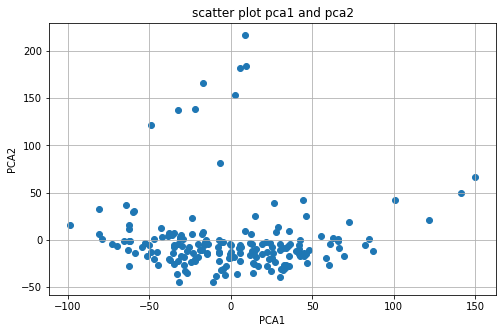

In [190]:
# plotting pca1 and pca 2
plt.figure(figsize=(8,5))
plt.scatter(df1['PCA1'],df1['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
plt.grid()
plt.show()

### Adding hystological type_other

In [193]:
data_col = parse('PAAD.gct',col_meta_only=True).T   


In [194]:
data_col=data_col.loc[['histological_type','histological_type_other']]

In [195]:
data_col.isna().sum().sum()

157

In [196]:
# we have to replace the nan values with most occuring value
data_col.loc['histological_type'].mode()

0    pancreas-adenocarcinoma ductal type
dtype: object

In [197]:
data_col.loc['histological_type'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)
data_col.loc['histological_type_other'].fillna('pancreas-adenocarcinoma ductal type',inplace=True)

In [198]:
df2=df1.copy()

In [199]:
df2['label']= list(data_col.iloc[1])

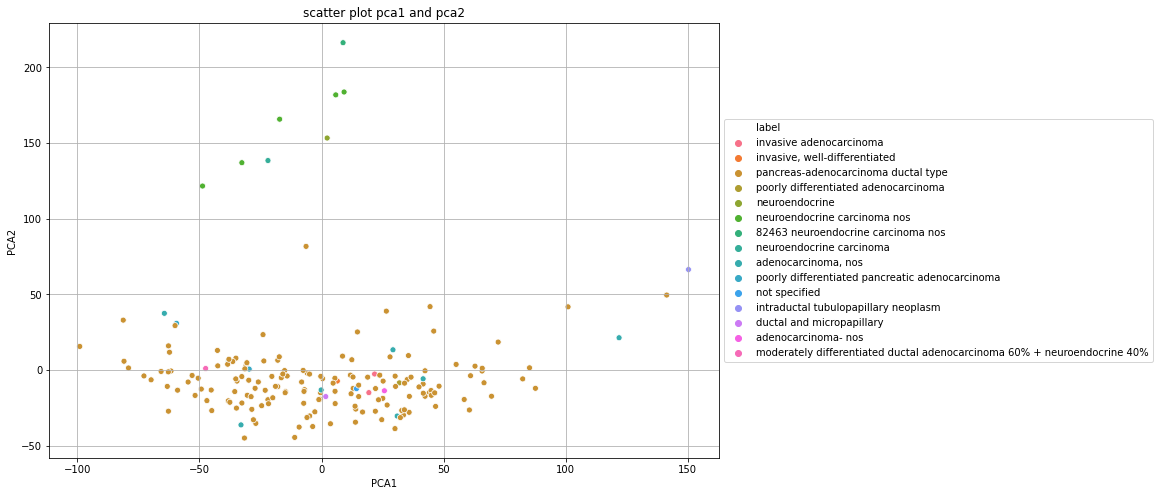

In [205]:
#visualising the PCA
plt.figure(figsize=(12,8))
ax=sns.scatterplot(df2['PCA1'],df2['PCA2'],hue=df2['label'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('scatter plot pca1 and pca2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

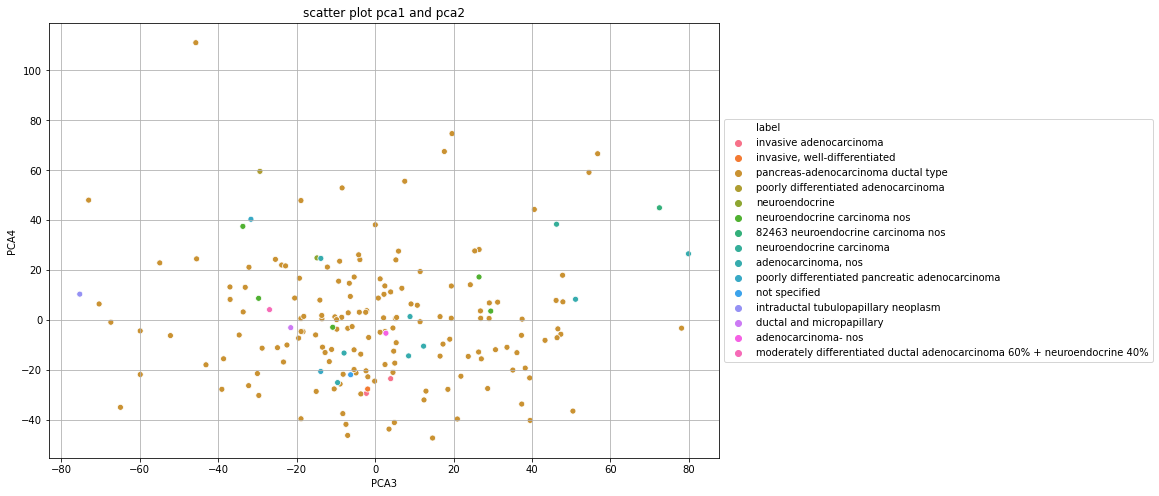

In [278]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(df2['PCA3'],df2['PCA4'],hue=df2['label'])
plt.xlabel('PCA3')
plt.ylabel('PCA4')
plt.title('scatter plot pca3 and pca4')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

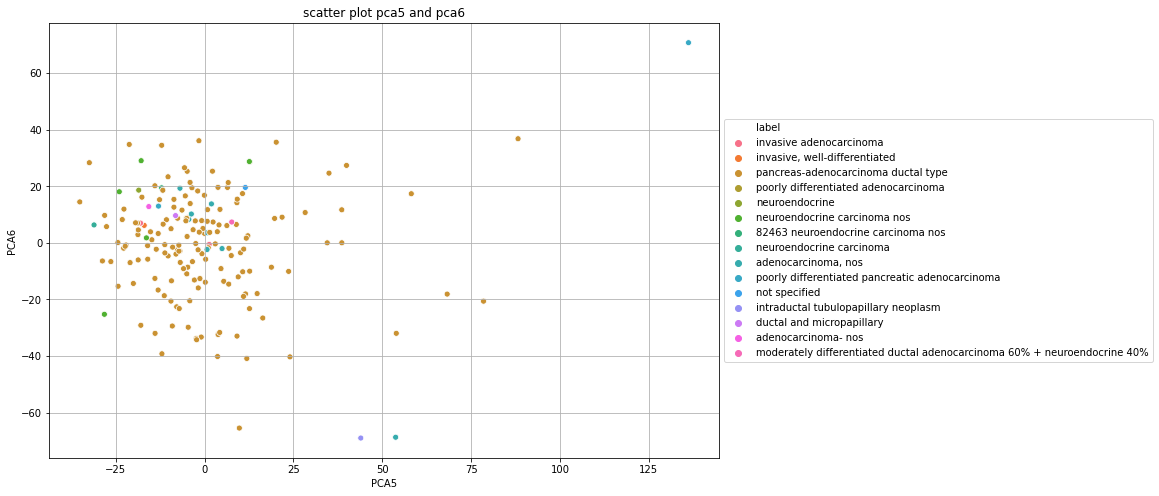

In [279]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(df2['PCA5'],df2['PCA6'],hue=df2['label'])
plt.xlabel('PCA5')
plt.ylabel('PCA6')
plt.title('scatter plot pca5 and pca6')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [ ]:
### converting the y labels to categorical using label encoding

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df2['label'])

In [ ]:
### Since a plot to demonstrate the contribution to pca is required we can plot the eigen vectors along with the magnitude and also variance ration gives us a lot of information.

In [282]:
### took help from Stackoverflow for this- https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis#:~:text=To%20sum%20up%2C%20look%20at,contributes%20to%20that%20principal%20component.

In [244]:
def myplot(score,coeff,labels,y):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

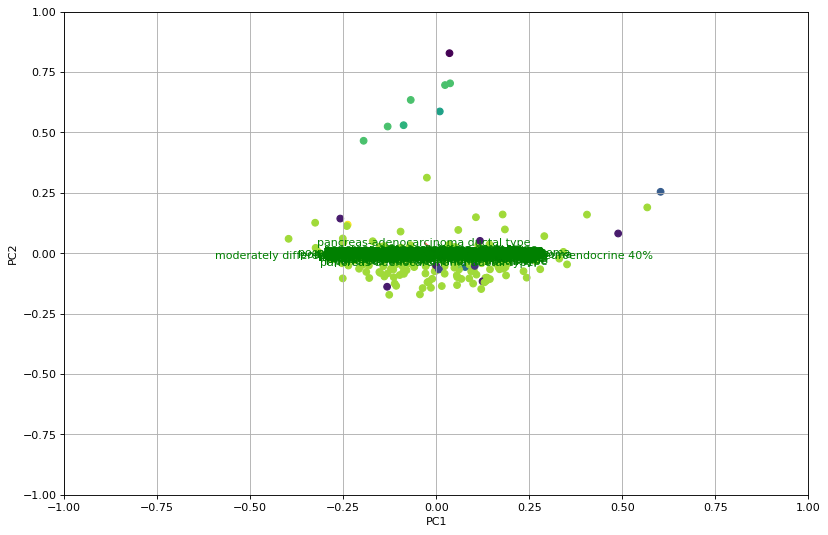

In [245]:
myplot(df[:183,0:2],np.transpose(pca.components_[0:2, :183]),df2['label'].values,y)
plt.show()

In [284]:
print(abs(pca.components_))
# the values in the components are like [component,features vector] thus finding out most important feature

[[0.00404791 0.00612349 0.00310062 ... 0.00079514 0.00676161 0.00487578]
 [0.00325766 0.01369288 0.00335949 ... 0.01100359 0.00669028 0.00122993]
 [0.00162105 0.02195386 0.00681151 ... 0.01059319 0.00443009 0.00849335]
 ...
 [0.00099232 0.0074508  0.00178739 ... 0.00658124 0.00012085 0.00393247]
 [0.00117714 0.00334648 0.01312887 ... 0.00461961 0.00198185 0.00158922]
 [0.00687716 0.00051863 0.01640455 ... 0.00479696 0.00063346 0.00242788]]


In [255]:
maxValuesObj = x.max(axis=1)
print('Most important feature for pca1- pca125 ')
print(maxValuesObj)# here index is eigen value of the feature.

Most important feature for pca1- pca125 
0      0.040939
1      0.054639
2      0.036121
3      0.109752
4      0.055085
         ...   
120    0.070479
121    0.069776
122    0.071357
123    0.083940
124    0.071298
Length: 125, dtype: float32


### 2.2 By analyzing the dataset the general behaviour I found out was Adenocarcinoma forms dense clusters and is in abundance. Neuroendocrine doesn't form cluster.

### 2.3 Some neuroendocrines are separable from the Adenocarcinoma wheras some overlap. But, mostly they are separable as Adenocrarcinoma forms clusters.

### 2.4 around 97-98 percent of the values are from pca 125 thus it tells a lot about the variance of pca

### 2.5 most important feature for PCA 1 was with value 0.040939 and was for aab1-Primary solid Tumor for pca2 it was for  0.054639 value and so on. 

### 2.6 Removing neuroendocrine data 

In [17]:
merge_columns = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']
participant_id = col_data.participant_id
target_variable = col_data.sample_type
col_data = col_data.set_index('participant_id')
f_data = f_data.rename(columns=participant_id).T
f_data.head()

rid,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
aab4,8.10,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
aab6,7.20,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
aab8,8.00,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
aab9,7.65,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


In [20]:
for col in merge_columns:
    f_data[col] = col_data[col]
f_data.head()

rid,SLC35E2,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZZZ3,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,...,9.3,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
aab4,8.10,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,...,8.9,Primary solid Tumor,2.0,yes,alive,6.8,stage iib,m0,n1,t2
aab6,7.20,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,...,9.2,Primary solid Tumor,3.0,yes,dead,5.0,stage iia,m0,n0,t3
aab8,8.00,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,...,9.3,Primary solid Tumor,1.0,yes,alive,3.5,stage iib,m0,n1,t3
aab9,7.65,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,...,9.2,Primary solid Tumor,4.0,yes,dead,4.0,stage iib,m0,n1,t3


In [21]:
f_data = f_data[f_data['adenocarcinoma_invasion']=='yes']
f_data.shape

(182, 14107)

In [22]:
len(f_data.columns)

14107

### 3 Unsupervised Learning

In [41]:
f_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00


In [43]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14098 entries, SLC35E2 to ZZZ3
Columns: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
dtypes: float32(183)
memory usage: 9.9+ MB


In [45]:
col_data['mRNAseq_cluster'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

### Applying KMEANS algorithm

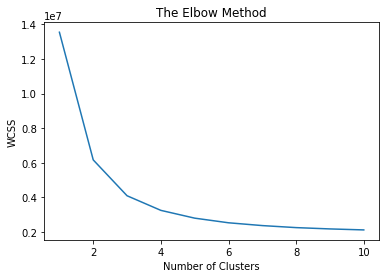

In [67]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(f_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
###  thus 4 clusters to be used

In [156]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit_transform(f_data)
y_kmeans=kmeans.predict(f_data)

In [80]:
kmeans.labels_

array([2, 1, 2, ..., 0, 3, 3])

In [157]:
f_data['clusters']=y_kmeans

In [103]:
f_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor,clusters
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05,2
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90,1
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70,2
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30,0
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00,3


In [105]:
col_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, aab1-Primary solid Tumor to aapl-Primary solid Tumor
Columns: 124 entries, participant_id to year_of_tobacco_smoking_onset
dtypes: float64(49), int64(10), object(65)
memory usage: 178.7+ KB


### now to find the correaltion

### 3.3 since the values of the clusters are categorical and that of the gene expression data is numerical we should apply anova test to get better results, we can have the null hypothesis that there is no correlation and then find the anova stats to prove the hypothesis.

In [109]:
f,p= stats.f_oneway(f_data['clusters'],f_data['aab1-Primary solid Tumor'],f_data['aab4-Primary solid Tumor'])

In [110]:
f,p

(61508.53102816124, 0.0)

### 3.2 for sample meta_data assuming column data to be sample metadata

In [131]:
f_data=f_data.T

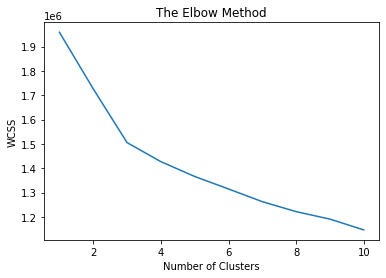

In [132]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(f_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### taking clusters to be 8 

In [133]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=0)
kmeans.fit_transform(f_data)
y_kmeans=kmeans.predict(f_data)

In [134]:
col_data['clusters']=y_kmeans

In [135]:
col_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset,clusters
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0,4
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN,4
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN,3
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN,3
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN,4


In [161]:
f,p= stats.f_oneway(col_data['clusters'],col_data['mRNAseq_cluster'],col_data['days_to_death'])

In [159]:
f,p

(64367.03519796989, 0.0)

### Bonus Question

In [165]:
ifn= pd.read_csv('type1_IFN.txt', header=None)
ifn.columns = ['member']
ifn.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [169]:
x=ifn['member'].to_list